# <font color= red> MODULE 3: BUILDING DEEP LEARNING MODELS WITH KERAS </font>

# Model Building Steps:

1. Specify Architecture
    - Eg. # of nodes, layers, activation functions, etc
2. Compile Model
    - Specify loss funciton and some details about how optimization works
3. Fit Model
    - Cycle through feedforward predictions and back propogations and using gradient descent to optimize weights
4. Make Predictions and Test!

In [30]:
# import data
import pandas as pd
df=pd.read_csv('worker_wages.csv')
print(df.columns)
df.head()

Index(['wage_per_hour', 'union', 'education_yrs', 'experience_yrs', 'age',
       'female', 'marr', 'south', 'manufacturing', 'construction'],
      dtype='object')


,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [31]:
#data looks good! Lets split the predictors and target into numpy arrays
predictor_cols = ['union', 'education_yrs', 'experience_yrs', 'age','female', 'marr', 'south', 'manufacturing', 'construction']
predictors = df[predictor_cols].as_matrix()
target = df.wage_per_hour.as_matrix()

print(predictors[0:5],'\n')
print(target[0:5])

[[ 0  8 21 35  1  1  0  1  0]
 [ 0  9 42 57  1  1  0  1  0]
 [ 0 12  1 19  0  0  0  1  0]
 [ 0 12  4 22  0  0  0  0  0]
 [ 0 12 17 35  0  1  0  0  0]] 

[ 5.1   4.95  6.67  4.    7.5 ]


# Specifying a Model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

**Instructions**
- Store the number of columns in the predictors data to n_cols. This has been done for you.
- Start by creating a Sequential model called model.
- Use the .add() method on model to add a Dense layer.
  - Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another Dense layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.

**VIDEO: Specifying Model**

Number of Columns:
- Remember, we must specify the number of columns (save as n_cols) of the predictors, as this will be the number of nodes we have in the input layer!

Sequential Models:
- There are two ways of building a model, Sequential is the easiest way so we will focus on that for now. 
- Sequential models requires that each layers has weights or connections only to the one layer coming directly after it in the network diagram. 
- There are more exotic models with complex patterns of connecitons, but we will come there later

'Dense' layers
- Add the first layer using model.add(Dense...)
- Dense is the standard layer that we have seen in the diagrams so far
- It is called 'Dense' because all the nodes in the previous layer connect to all of the nodes in the current layer
- As you advance in Deep Learning you may start using layers that are NOT dense, but lets stick with these for now
- In first layer, you specify:
 - first arg: number of nodes
 - second arg: activation function
 - third layer: INPUT SHAPE (this only applies to the first layers)
   - input_shape = (n_cols,), this means that input data will have n_cols inputs, and we leave the space after the column blank because we can have ANY number of observations (rows)

Second layer
 - model.add(Dense(100,activation='Relu',input_shape=(n_cols,)))

Third Layer
 - model.add(Dense(1))
 - Notice that this layer only has ONE node. This is the output layer, and matches the diagrams where we ended with just a prediciton.
 
**So this model has TWO hidden layers, and an output layer. You may be struck that each hidden layers has 100 rows. This is normal, and its quite common to have even 1000s of nodes in hidden layers. We will learn more about choosing appropriate number of nodes layer**

![](modelspec.png)


In [32]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer 
# this effecitvely adds the input layer as well with the last arg!!!
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))


# Compiling a Model

**VIDEO: Compiling and Fitting a Model**
After specified a model, next step is to complie while sets up network for optimization... for instance creating internaal funciton to do back propogation efficiently.

Compile method has TWO different arguments for you to choose:
1. Specify the optimizer
 - Controls the learning rate
 - In practice, choosing the right learning rate can effect how fast out model finds the right weights, and even HOW GOOD the weights it finds are
 - There are a few algos that automatically tune the learning rate. BUT even many experts dont know all of these, so best approach is to choose a versatile algo: 'Adam'
 - **'Adam' is a excellent choice for goto optimizers. It adjusts learning rate as it goes through gradient descent, to ensure reasonable values throughout weight optimization process. **
2. Choose the loss function (error metric)
  - mean_squarred_error is the most common for regression problems
  - we will use a different default metric when we use keras for classifiers

Fitting a Model
- As we know, fitting a model is applying backpropogation and gradient descent with your data to update the weights
- Scaling data: even with the 'Adam optimizer', it can imporve optimization process if, on average, each feature has similar size values
- one common approach is to normalize by:
  - subtract each feature by that features mean, and divide by that features standard deviation



![](compilefit.png)

You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer (https://arxiv.org/pdf/1412.6980v8.pdf).

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!

**Instructions**

Compile the model using model.compile(). Your optimizer should be 'adam' and the loss should be 'mean_squared_error'.

In [33]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


# Fitting the Model

You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

**Instructions**

Fit the model. Remember that the first argument is the predictive features (predictors), and the data to be predicted (target) is the second argument.

In [34]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

Epoch 1/10
534/534 [==============================] - 0s - loss: 36.2535     
Epoch 2/10
534/534 [==============================] - 0s - loss: 26.9723     
Epoch 3/10
534/534 [==============================] - 0s - loss: 23.7572     
Epoch 4/10
534/534 [==============================] - 0s - loss: 22.6871     
Epoch 5/10
534/534 [==============================] - 0s - loss: 22.1638     
Epoch 6/10
534/534 [==============================] - 0s - loss: 22.2581     
Epoch 7/10
534/534 [==============================] - 0s - loss: 22.0867    

# Classification Model

**VIDEO: Classification Models**

Deep learning works similar for predicting outcomes from set of discrete options (classification). There are a few main differences.

**First: Set loss function to **'categorical_crossentropy'** instead of mean squared error. This isn't the only loss funciton possible for classification, but it is by far the most common.**
- This loss function is similar to log loss (lower is better)
- However this score is still hard to interperet. So we **add 'metrics=['accuracy''** to compile step for easy-to-understand diagnostics. This print out accuracy score at the end of each epoch.
  
**Second: Modify last (Output) layer has separate node for each possible outcome and uses 'softmax' activation.**
- Softmax activation function ensures predictions sum to one so they can be intepreted as probabilities.

Here is the code for buidling this classifier model:
1. **from keras.utils import to_categorical:** First we import utility function to turn a single categorical column into multiple 0 or 1 columns (so each new column represents a possible categorical outcome... we've done this before... I think it is the same as pd.to_categorical or something like that. This is called onehot encoding I beleive
2. then read in data. use drop command without target columns, and store it as a numpy matrix. Set target column to caterogical columns!
3. then build model! This looks simliar to the model we've built before, except for that **the last layer has TWO NODES for the two possible outcomes, and it uses the softmax function**

![](classification.png)

As we can see from results below, both accuracy and loss improve measurable for first three epochs. We will soon see a more effective way of determining how many epochs or how long to train a model, but training for ten epochs seemed to work well in this case!

![](results1.png)





# Understanding your classification data

Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. This data is from a tutorial on data science competitions. Look here for descriptions of the features.

The data is pre-loaded in a pandas DataFrame called df.

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the .describe() method in the IPython Shell to answer this question.

In [35]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


# Last steps in classification models

You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

**Instructions:**

- Convert df.survived to a categorical variable using the to_categorical() function.
- Specify a Sequential model called model.
- Add a Dense layer with 32 nodes. Use 'relu' as the activation and (n_cols,) as the input_shape.
- Add the Dense output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the activation should be 'softmax'.
- Compile the model, using 'sgd' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the predictors and the target.

In [36]:
# convert data from DataFrame to matrix (predictors).
# we don't need to convert target to a matrix, as the to_categorical function will do that for us
predictor_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'male',
       'age_was_missing', 'embarked_from_cherbourg',
       'embarked_from_queenstown', 'embarked_from_southampton']

predictors = df[predictor_cols].as_matrix()

# get number of input nodes
n_cols = predictors.shape[1]

In [37]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


Epoch 1/10
891/891 [==============================] - 0s - loss: 2.3033 - acc: 0.5903      
Epoch 2/10
891/891 [==============================] - 0s - loss: 1.2271 - acc: 0.6431     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.8583 - acc: 0.6364     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6840 - acc: 0.6588     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6717 - acc: 0.6622     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6341 - acc: 0.6768     

In [38]:
target

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

# Using Models

The things you'll want to do after you've used these models is:
- save a model after training
- reload model
- make predictions with the model

Models are saved in format called 'HTF5', for which h5 is the common extension. 

Use **my_model.summary()** to get a summary of the models architecture.


# Making predictions
The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

**Instructions:**

- Create your predictions using the model's .predict() method on pred_data.
- Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.

In [39]:
# import data to make predictions on
pred_data = pd.read_csv('predictor_data.csv').as_matrix()
pred_data.shape

(91, 10)

In [40]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/10
891/891 [==============================] - 0s - loss: 2.3976 - acc: 0.5769     
Epoch 2/10
891/891 [==============================] - 0s - loss: 1.9229 - acc: 0.6016     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.9183 - acc: 0.6364     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.8106 - acc: 0.6330     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.7867 - acc: 0.6498     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.8597 - acc: 0.6285     

# <font color= red> MODULE 4: FINE-TUNING KERAS MODELS </font>

# Understanding Model Optimization

In practice, model optimization is super tough. The optimal value of any one weight, depends on the values of the other weights. 
Even if the slope tells us what weights to increase and what weights to decrease, it may not improve our model meaningfully. A small learning reate might cause updates that model doesnt improve materially, and a large learning rate might take us too far in the right direction. A smart optimization algorithm like 'Adam' helps, but problems can still occur. 

The easiest way to see the effect of difference learning rates is to use the simplest optimizer, **stochastic gradient descent**. This optimizer uses a fixed learning rate, usually around 0.01, but you can specify with the lr argument as seen below. 
We create models in a 'for loop', and each time around, we pass in the SDG optimizer using a different learning rate (low, medium, and high). Then you compare the results to see which is best!
![](sgd.png)

**The dying neuron problem**

But even if the learning rate is well tuned, you can run into dying neuron problem. This problem occurs when a neuron takes the value of zero, for ALL rows of your data.

Remember how in the Relu function any node with a negative value will have an ouput value of zero (see below), and it also has a slope of zero. **Because the slope of zero, the slope of any weights going into that node are ALSO zero, so those weights dont get updated.  **
In other words:
- Once the node starts getting negative inputs, it may continue ONLY getting negative inputs. 
- therefore, it will contribute nothing to the model, and hence the claim that the node or neuron is dead.

**Alternatives?**

At first, this problem suggests that it would be good to use an activation function whose slope is NEVER EXACTLY ZERO. However those types of functions were indeed used for MANY years. Using the 'tanh' activation function for instance, values that were outside the middle of the 'S' were relatively flat, and had small slopes. In a deep network, the repeated multiplicaiton of small slopes causes the slopes to get close to zero which means updates in backpropogation were close to zero. **This is known the 'Vanishing Gradient Problem'.**. Not a huge issue to think about right now, but its go to know, as you may need to change the activation function of your model at some point. 



![](dyingneuron.png)

# Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate." You'll want to look at the results after running this exercise, **remembering that a low value for the loss function is good.**

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

**Instructions**

- Import SGD from keras.optimizers.
- Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
- Using a for loop to iterate over lr_to_test:
  - Use the get_new_model() function to build a new, unoptimized model.
  - Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
  - Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
  - Fit your model using the predictors and target.
  
<font color=red> Keep in mind here that you are using the data from above: the 'predictors' and 'target' data sets from the titanic analysis. You do not reload them below so you need to run the above code first!

In [41]:
input_shape = (n_cols,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu',input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [42]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)




Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s - loss: 4.1443     
Epoch 2/10
891/891 [==============================] - 0s - loss: 4.1010     
Epoch 3/10
891/891 [==============================] - 0s - loss: 4.0564     
Epoch 4/10
891/891 [==============================] - 0s - loss: 4.0107     
Epoch 5/10
891/891 [==============================] - 0s - loss: 3.9644     
Epoch 6/10
891/891 [==============================] - 0s - loss: 3.9178     

**Neat!!! The model with the middle learning rate of 0.01 produced the lowest loss function values. That makes sense.** 

# Model Validation

Recall that your models performance on training data is not a good indication on how it will perform on NEW data. This is why we use 'validation data', which is data that is explicitly held out from training and used only to test model performance.

Kfold cross validation is an example of this. **But in practice, few people run kfold cross validation on deep learning models because deep learning is typically used on large data sets, so the computational expense of using kfolds on a neural net model would be large. ** So we usually use a single validation score for these models, because these validaiton runs are reasonably large. 

Keras makes it easy to use some of your data as validation data, and we see that it the code below where we specify the 'validation_split' when calling the fit method. The 0.3 refers to the fraction of the date we want to use for validation.  


*In the example below we have a classificaiton model, so we include measure of accuracy in the 'compile' method.*
![](Picture1.png)

**Early Stopping:**

Our goal is to have the best validaiton score possible, so we should keep training while validation score is improving, and stop when it isnt improving. We do this with something called **early stopping**. 

The 'patience' arg in the EarlyStopping function, which we import from keras.callbacks, tells the model how many epochs the model can go without improving, before we stop training! usually 2 or 3 are good. The EarlyStopping is implemented as shown in the code below.

**Notice in the code below we also add 'epochs=20'. Model default is for 10 epochs, but since we have the early stopping in the model now, we can set the epochs to much higher, because it will simply stop when the model is no longer improving.**

![](Picture2.png)

Let's look at the outputs below! We see that after the 9th epoch, the val_loss score does not improve for 2 epochs... ie, the 10th and 11th epochs produce a higher val_loss score, so the model stops training. Note that the loss score still improves however, but because the val_loss score does not, training stops!
**Remember that val_loss is the loss from training on the 30% of data that we specified above... at least I think thats right.... lol**

![](Picture3.png)

# Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

**Instructions:**

- Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().
- Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.

In [43]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 1.4220 - acc: 0.5987 - val_loss: 0.8268 - val_acc: 0.6567
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.8807 - acc: 0.5971 - val_loss: 0.5460 - val_acc: 0.7127
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.6352 - acc: 0.6581 - val_loss: 0.6323 - val_acc: 0.6903
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.6423 - acc: 0.6629 - val_loss: 0.5778 - val_acc: 0.7127
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.5993 - acc: 0.6918 - val_loss: 0.5673 - val_acc: 0.7090
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.7231 - acc: 0.6340 - val_loss: 0.5481

# Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

**Instructions:**

- Import EarlyStopping from keras.callbacks.
- Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.
- Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of EarlyStopping() to be 2.
- Fit the model using the predictors and target. Specify the number of epochs to be 30 and use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks parameter.

In [49]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model, SET THE CALLBACKS ARG AS EARLY STOPPING AND SET EPOCHS TO 30
model = model.fit(predictors, target, epochs=30, validation_split=0.30, callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s - loss: 1.0888 - acc: 0.6244 - val_loss: 0.7931 - val_acc: 0.6567
Epoch 2/30
623/623 [==============================] - 0s - loss: 0.6747 - acc: 0.6485 - val_loss: 0.5556 - val_acc: 0.7537
Epoch 3/30
623/623 [==============================] - 0s - loss: 0.6219 - acc: 0.6870 - val_loss: 0.6058 - val_acc: 0.7164
Epoch 4/30
623/623 [==============================] - 0s - loss: 0.6142 - acc: 0.6774 - val_loss: 0.6814 - val_acc: 0.6493
Epoch 5/30
623/623 [==============================] - 0s - loss: 0.5888 - acc: 0.6918 - val_loss: 0.5195 - val_acc: 0.7649
Epoch 6/30
623/623 [=====

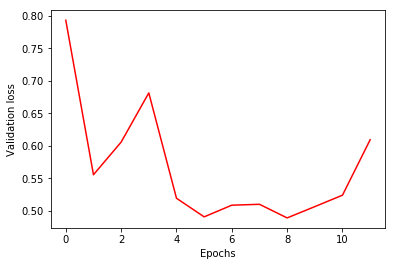

In [50]:
# Create the plot
plt.plot(model.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()